In [1]:
print("""
@File         : 1-introduction_to_seaborn.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-08-16 14:38:46
@Email        : cuixuanstephen@gmail.com
@Description  : Utilizing seaborn for advanced plotting
""")


@File         : 1-introduction_to_seaborn.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-08-16 14:38:46
@Email        : cuixuanstephen@gmail.com
@Description  : Utilizing seaborn for advanced plotting



In [17]:
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # 这样是不好的，但是为了减少 warning 输出

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col="date", parse_dates=True
)

quakes = pd.read_csv("data/earthquakes.csv")

<Axes: xlabel='magType', ylabel='mag'>

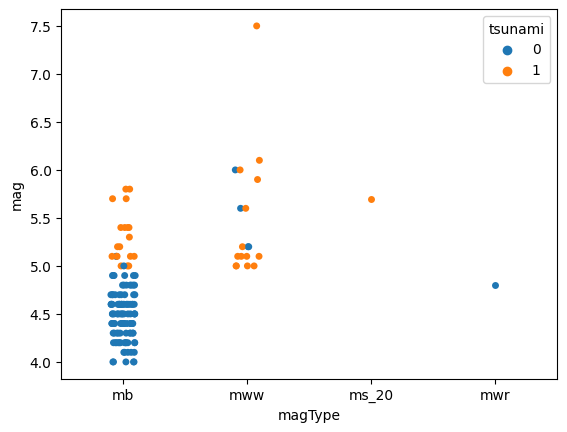

In [18]:
sns.stripplot(
    x="magType", y="mag", data=quakes.query("parsed_place == 'Indonesia'"),
    hue="tsunami"
)

<Axes: xlabel='magType', ylabel='mag'>

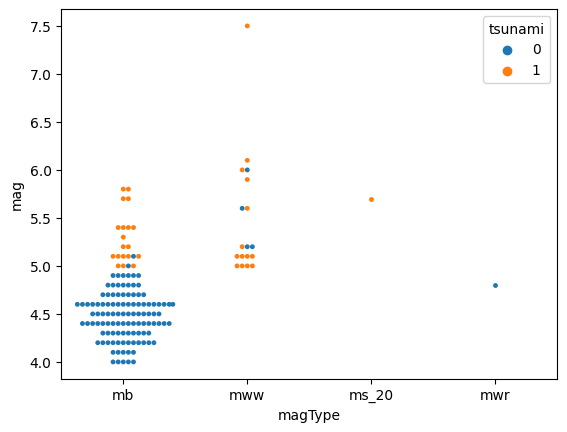

In [19]:
sns.swarmplot(
    x="magType", y="mag", data=quakes.query("parsed_place == 'Indonesia'"),
    hue="tsunami", size=3.5
)

Text(0.5, 1.0, 'Comparing earthquake magnitude by magType')

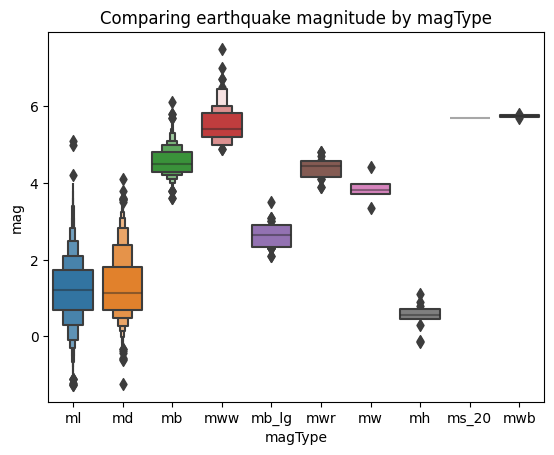

In [20]:
sns.boxenplot(
    x="magType", y="mag", data=quakes[["magType", "mag"]].dropna()
)

plt.title("Comparing earthquake magnitude by magType")

Text(0.5, 1.0, 'Comparing earthquake magnitude by magType')

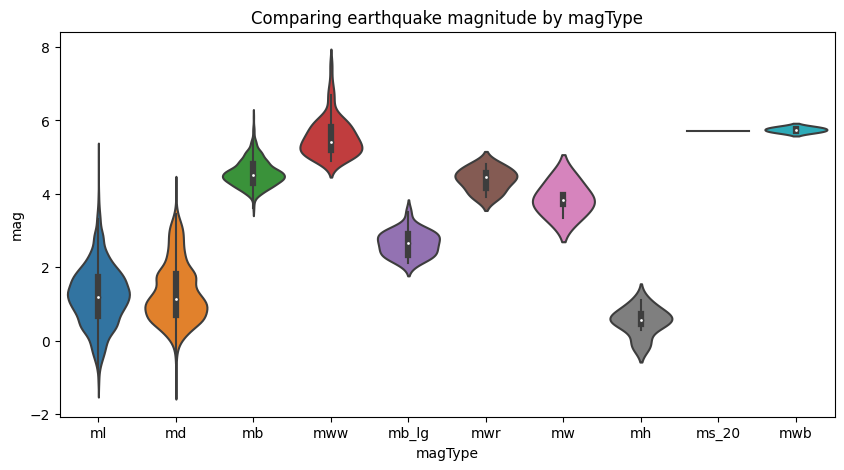

In [23]:
fig, axes = plt.subplots(figsize=(10, 5))

sns.violinplot(
    x="magType", y="mag", data=quakes[["magType", "mag"]],
    ax=axes, scale='width'
)

plt.title("Comparing earthquake magnitude by magType")

#### Correlations and heatmaps

<Axes: >

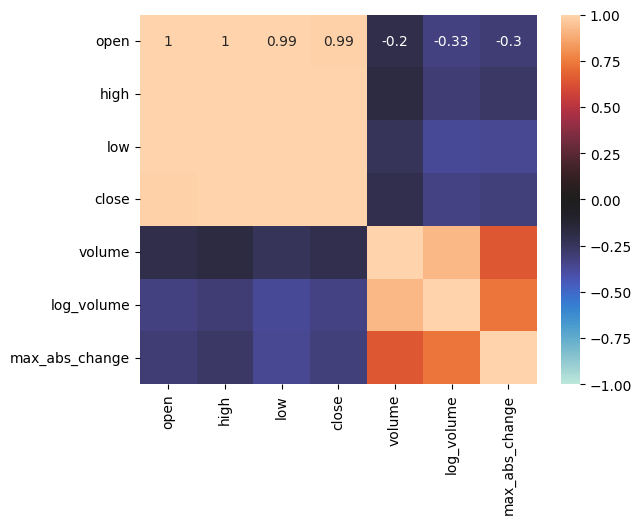

In [24]:
sns.heatmap(
    fb.sort_index().assign(
        log_volume=np.log(fb['volume']),
        max_abs_change=fb['high'] - fb['low']
    ).corr(),
    annot=True, center=0,
    vmin=-1, vmax=1
)

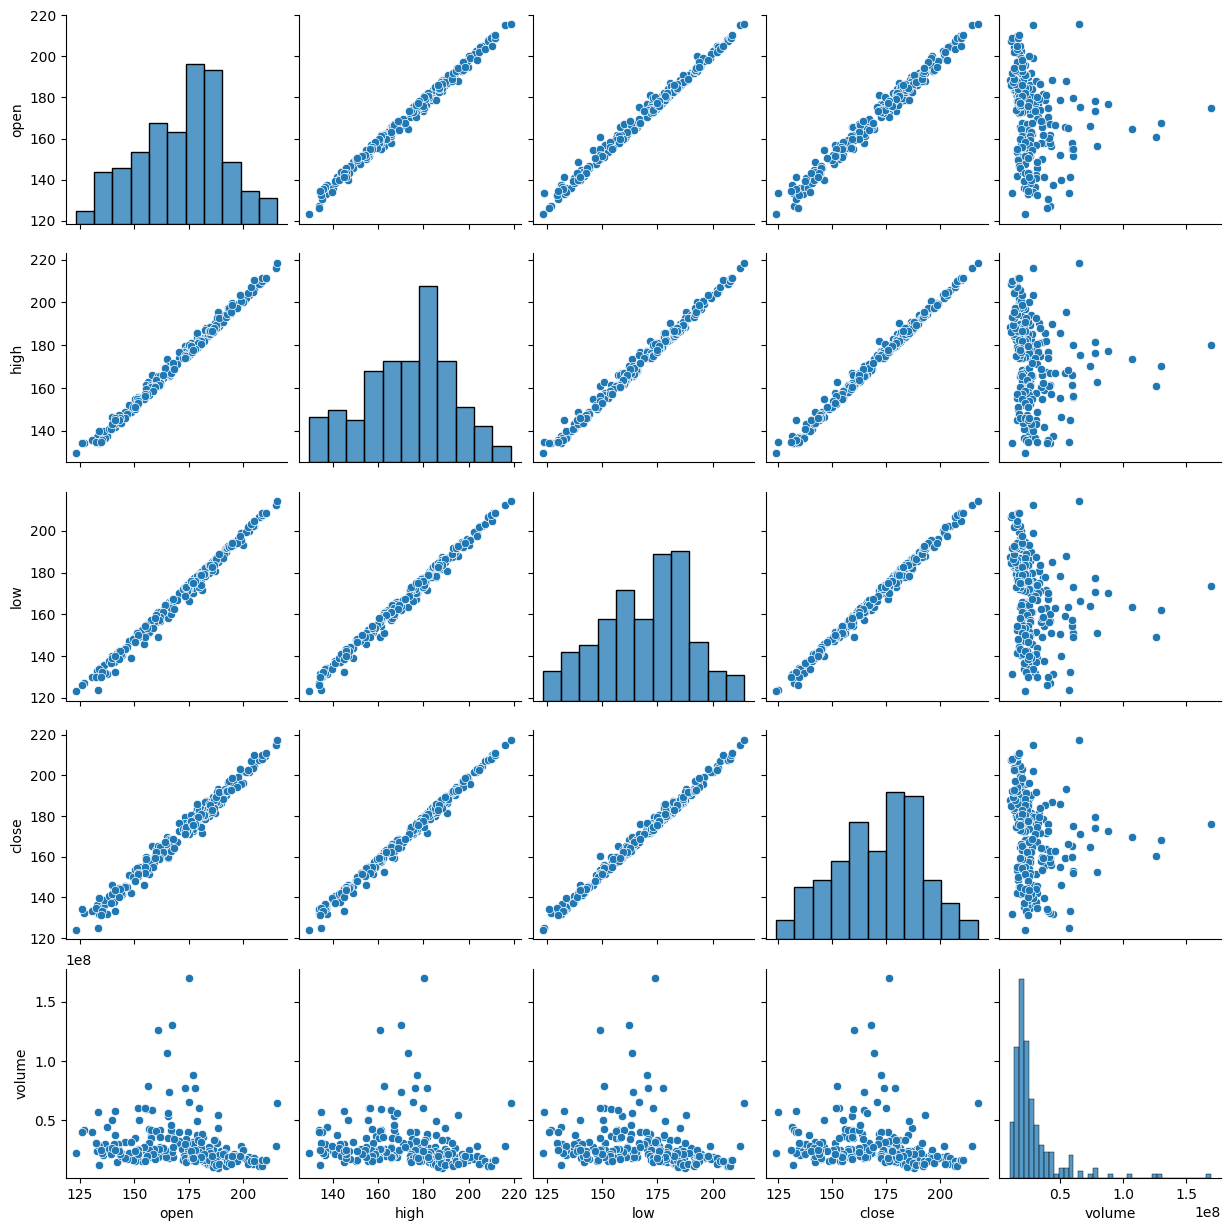

In [25]:
sns.pairplot(fb)

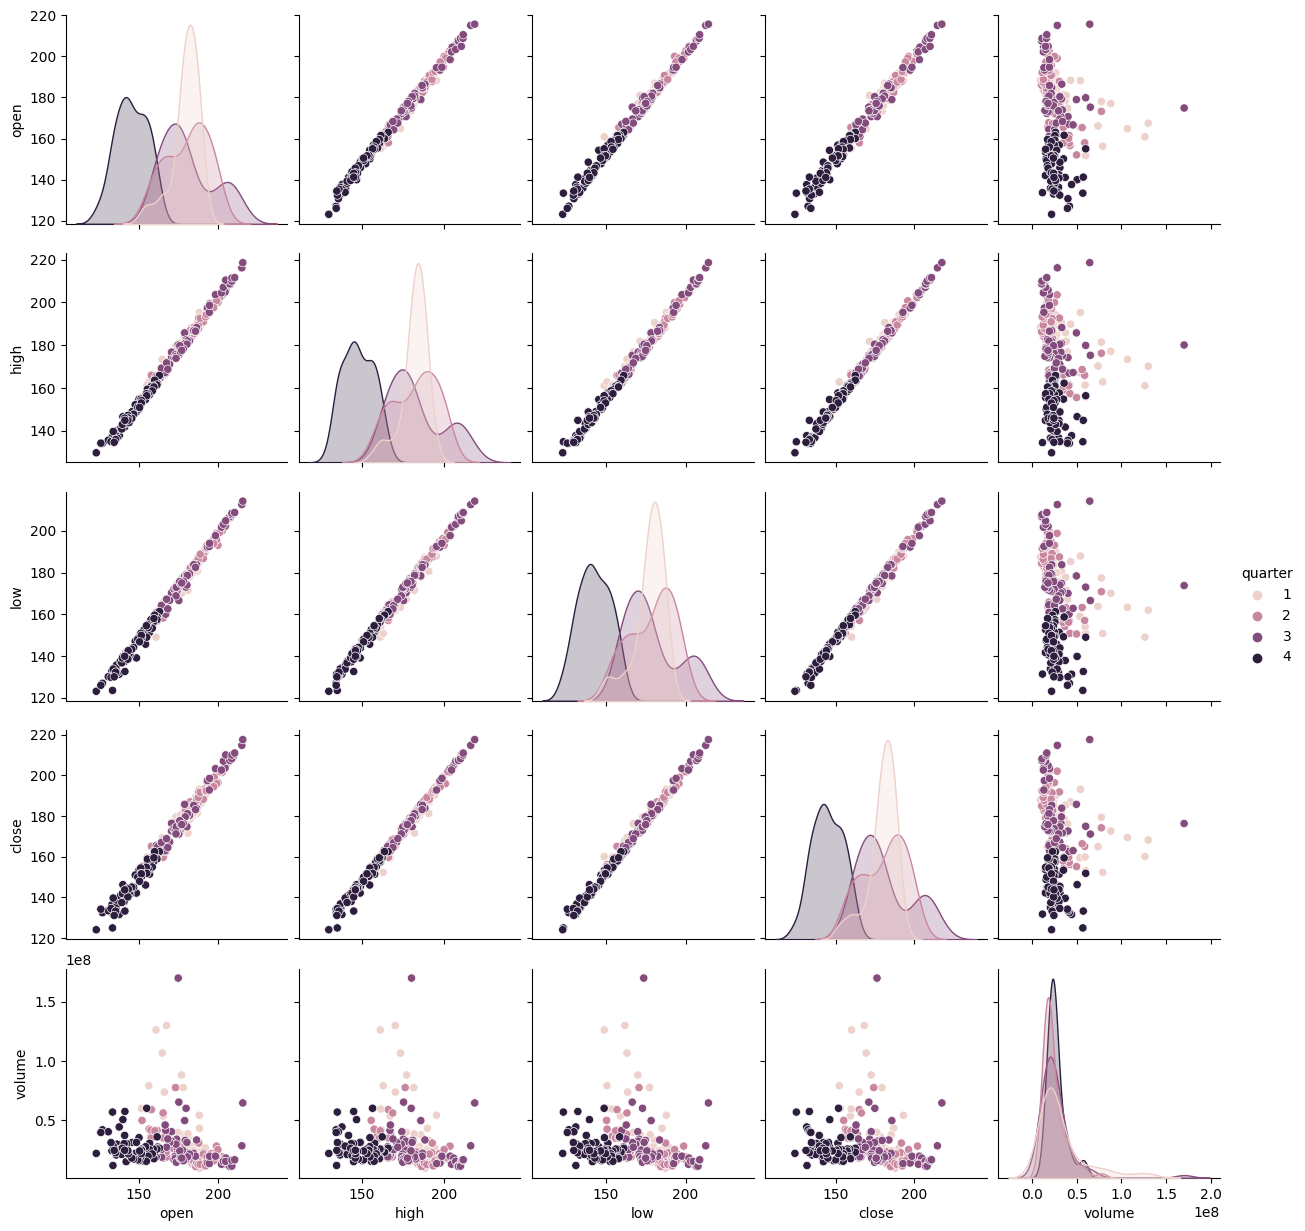

In [26]:
sns.pairplot(
    fb.assign(quarter=lambda x: x.index.quarter),
    diag_kind='kde', hue='quarter'
)

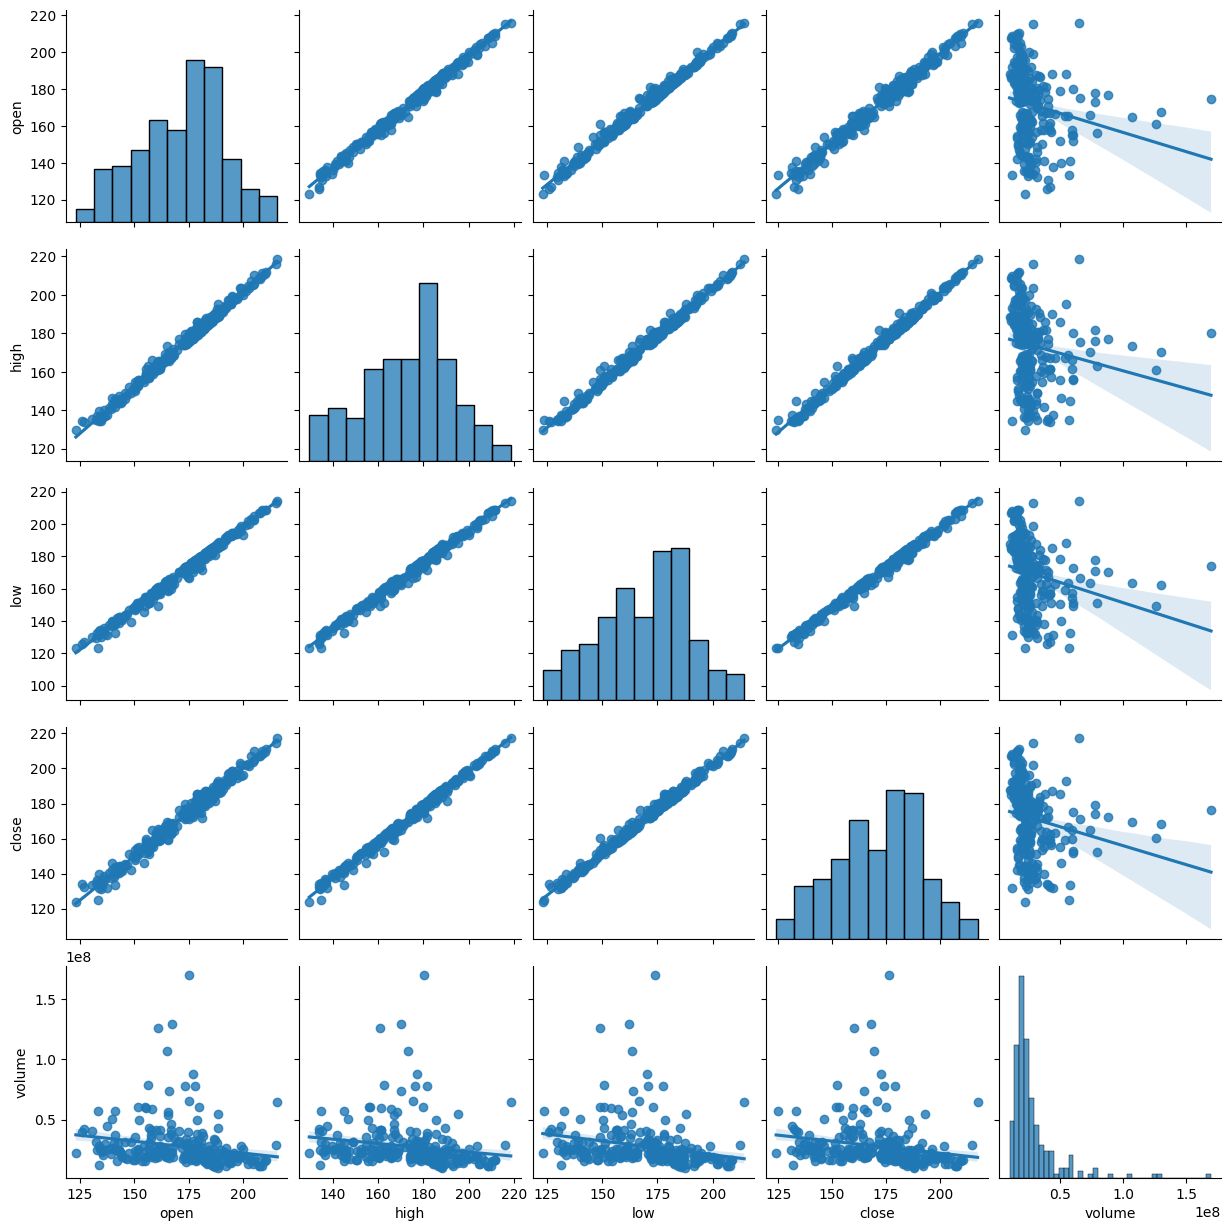

In [30]:
sns.pairplot(
    fb,#.assign(quarter=lambda x: x.index.quarter),
    kind='reg',# hue='quarter'
)

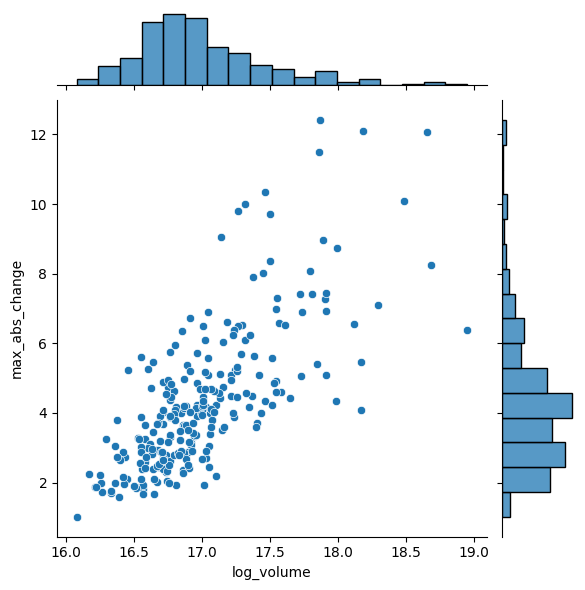

In [31]:
sns.jointplot(
    x='log_volume', y='max_abs_change',
    data=fb.assign(
        log_volume=np.log(fb['volume']),
        max_abs_change=fb['high'] - fb['low']
    )
)

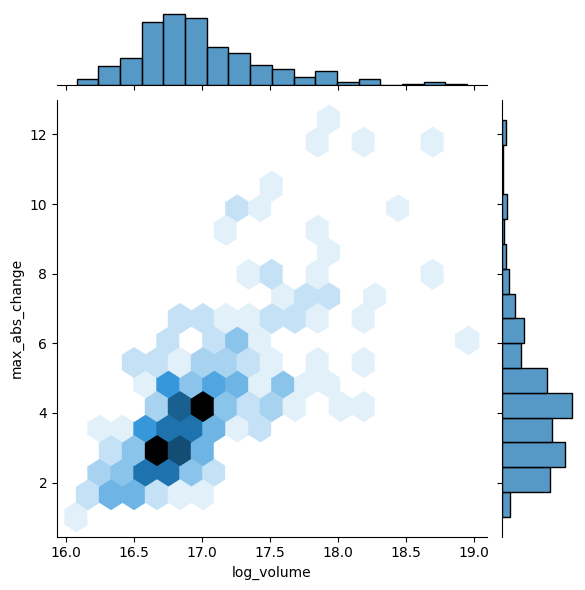

In [32]:
sns.jointplot(
    x='log_volume', y='max_abs_change',
    kind='hex',
    data=fb.assign(
        log_volume=np.log(fb['volume']),
        max_abs_change=fb['high'] - fb['low']
    )
)

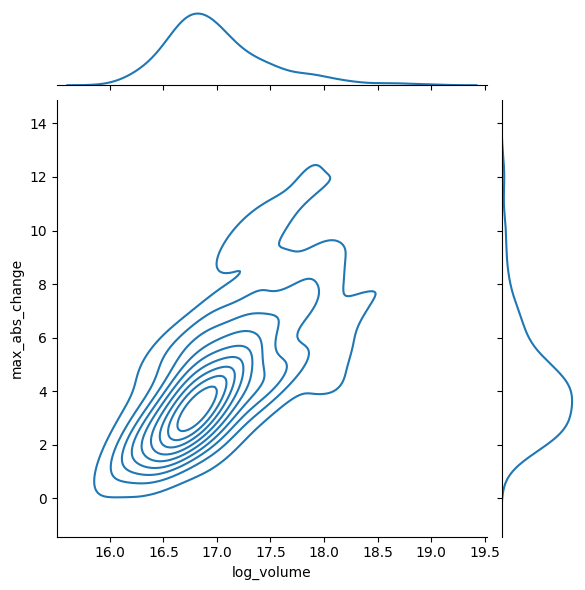

In [33]:
sns.jointplot(
    x='log_volume', y='max_abs_change',
    kind='kde',
    data=fb.assign(
        log_volume=np.log(fb['volume']),
        max_abs_change=fb['high'] - fb['low']
    )
)

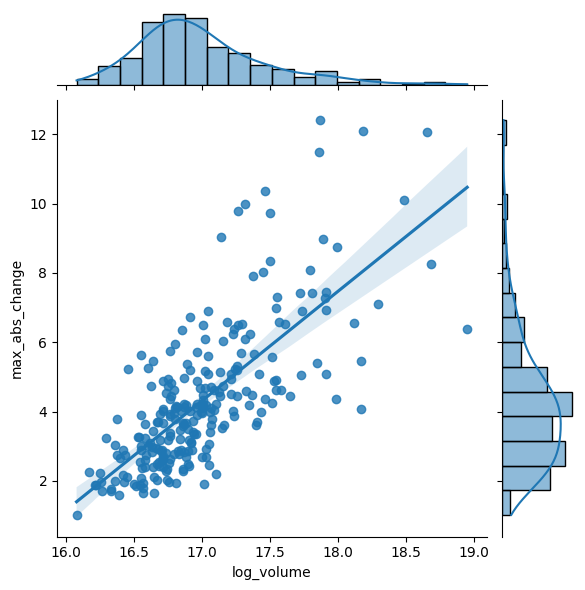

In [34]:
sns.jointplot(
    x='log_volume', y='max_abs_change',
    kind='reg',
    data=fb.assign(
        log_volume=np.log(fb['volume']),
        max_abs_change=fb['high'] - fb['low']
    )
)

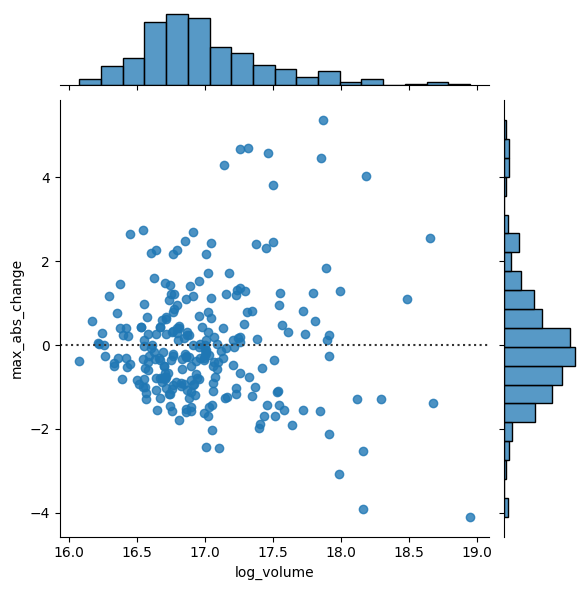

In [35]:
sns.jointplot(
    x='log_volume', y='max_abs_change',
    kind='resid',
    data=fb.assign(
        log_volume=np.log(fb['volume']),
        max_abs_change=fb['high'] - fb['low']
    )
)

#### Regression plots

In [38]:
fb_reg_data = fb.assign(
    log_volume=np.log(fb["volume"]),
    max_abs_change=fb["high"] - fb["low"]
).iloc[:, -2:]

In [40]:
import itertools

In [43]:
iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
    print(f"--> {i}")
    
print("This printed once because the iterator has been exhausted")

for i in iterator:
    print(f"--> {i}")

--> I'm an iterator
This printed once because the iterator has been exhausted


In [45]:
iterable = list(itertools.repeat("I'm an iterable", 1))

for i in iterable:
    print(f"--> {i}")
print('This prints again because it\'s an iterable:')

for i in iterable:
    print(f"--> {i}")

--> I'm an iterable
This prints again because it's an iterable:
--> I'm an iterable


In [48]:
from viz import reg_resid_plots

[<Axes: xlabel='log_volume', ylabel='max_abs_change'>,
 <Axes: xlabel='log_volume', ylabel='residuals'>,
 <Axes: xlabel='max_abs_change', ylabel='log_volume'>,
 <Axes: xlabel='max_abs_change', ylabel='residuals'>]

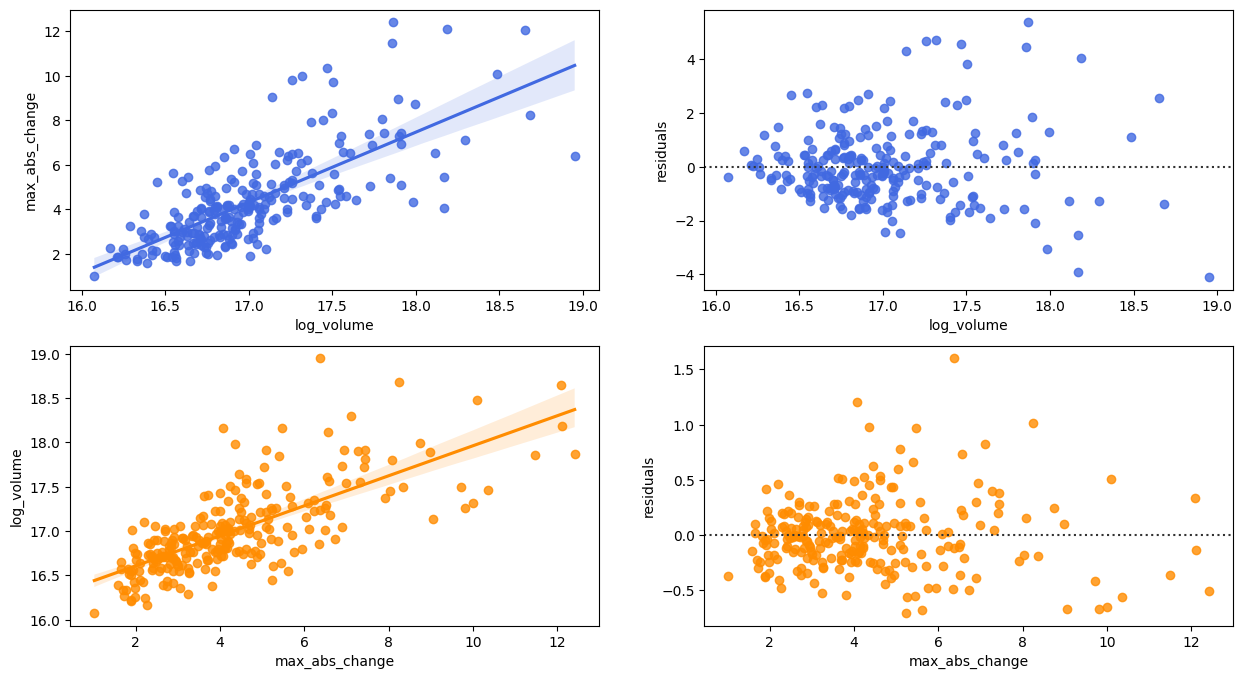

In [49]:
reg_resid_plots(fb_reg_data)

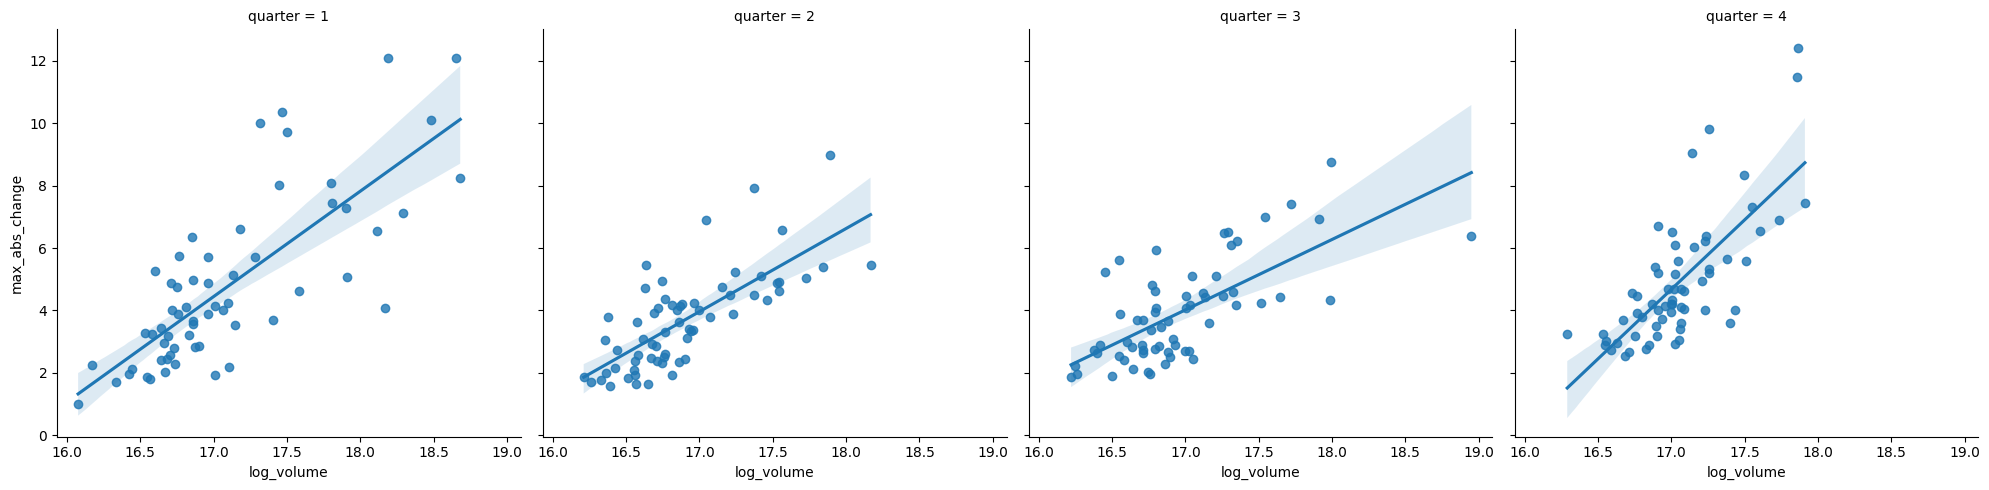

In [52]:
sns.lmplot(
    x="log_volume", y="max_abs_change",
    col="quarter",
    data=fb.assign(
        log_volume=np.log(fb["volume"]),
        max_abs_change=fb["high"] - fb["low"],
        quarter=lambda x: x.index.quarter
    )
)

Note that the result of running `lmplot()` is a `FacetGrid` object, which is a powerful
feature of `seaborn`.

#### Faceting

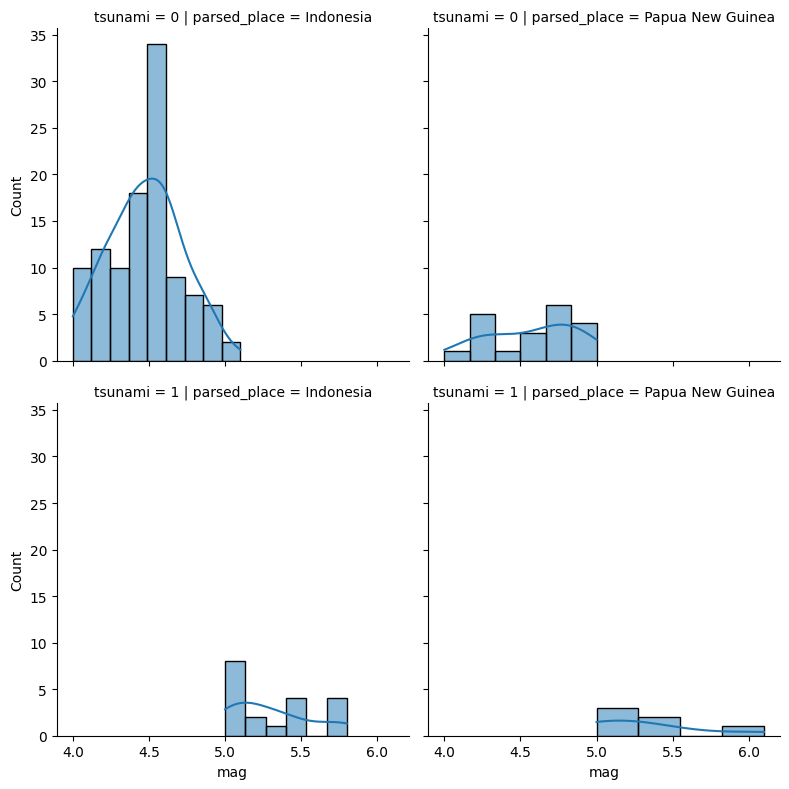

In [55]:
g = sns.FacetGrid(
    quakes.query(
        "parsed_place.isin(['Indonesia', 'Papua New Guinea']) and magType == 'mb'"
    ),
    row='tsunami', col='parsed_place', height=4
)

g = g.map(sns.histplot, 'mag', kde=True)